#                      Predicting House Prices with Machine Learning

![](Capture.png)

# Step 1: Problem statement

predicting house prices for house buyers and house sellers

# Step 2: Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib; 
import matplotlib.pyplot as plt

from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 3: Data Analysis

In [3]:
data.shape

(1460, 80)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
features = ['YearBuilt','TotalBsmtSF','GarageArea']
result = 'SalePrice'

# Step 4: Checking if the data set confirms to the pre-requsites(Assumptions)

# Pre-Requsite 1: The Target Variable should be normally distributed

If we see the mean and median of the Target Variable (In this case the sales column), We can notice that the mean and median are pretty close to each other, leading to the conclusion that the Target Variable is normally distributed


# Pre-Requsite 2: There should be a linear relationship between the Target varianble and the explanatory Variables

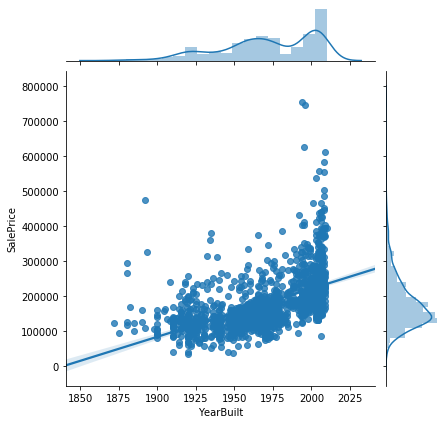

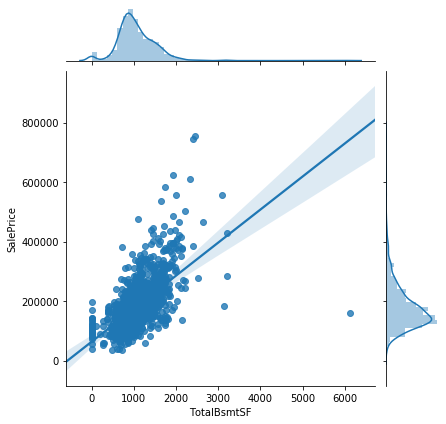

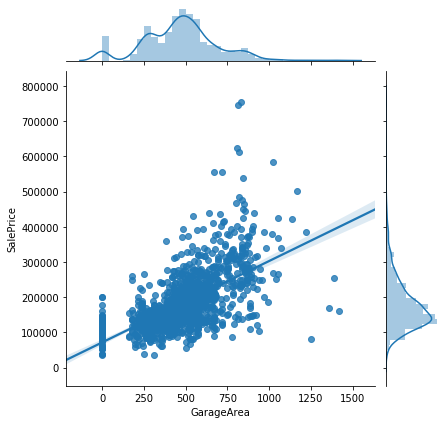

In [21]:
for feature in features:
    sns.jointplot(feature, result, data=data, kind='reg')

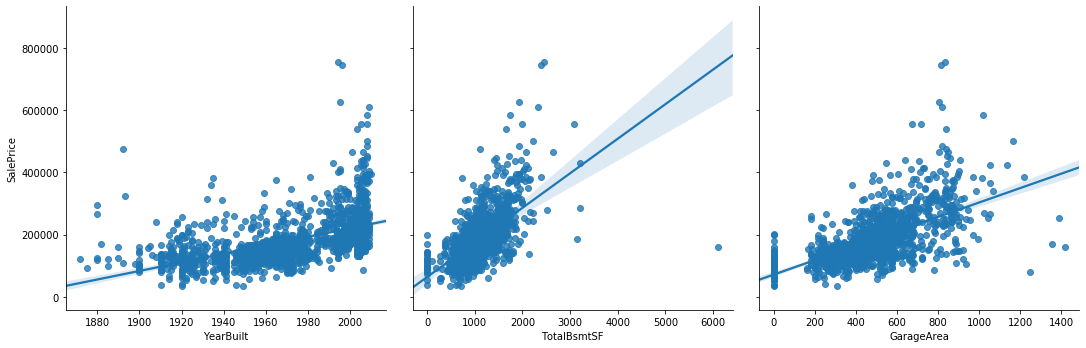

In [23]:
sns.pairplot(data, x_vars=features, y_vars=result, height=5, aspect=1, kind='reg')

# Pre-Requsite 3: The Explanatory Variables should not be co-related to each other

In [24]:
data[features].corr()

,YearBuilt,TotalBsmtSF,GarageArea
YearBuilt,1.000000,0.391452,0.478954
TotalBsmtSF,0.391452,1.000000,0.486665
GarageArea,0.478954,0.486665,1.000000


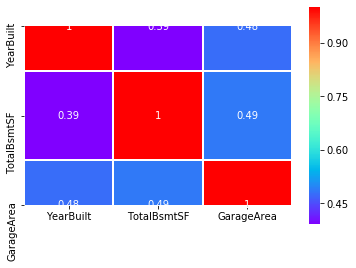

In [34]:
sns.heatmap(data[features].corr() ,annot =True,linewidths=1,square=True,cmap='rainbow');

# Pre-Requsite 4: The error terms must have constant variance(homoscedascity).

Since the Target Variable (In this case the sales column) is normally distributed, the error will also be normally distributed


# Step 5: Splitting the data into train and test data

we use the train_test_split function from sklearn.model_selction package to get the train and test data

In [35]:
from sklearn.model_selection import train_test_split
def split(x, y):
    return train_test_split(x, y, test_size=0.20, random_state=1)
x_train,x_test,y_train,y_test = split(data[features], data[result])

# Step 6: Scaling the data

Many a times the data will be in different units and different scales. To remove the differences caused by units etc we scale the data by using StandardScaler in sklearn.preprocessing package

# Making New Scaler

In [36]:
from sklearn.preprocessing import StandardScaler
feature_scalers = [];
for feature in features:
    scaler = StandardScaler().fit(np.array(x_train[feature]).reshape(len(x_train.index),1))
    feature_scalers.append(scaler)
result_scaler = StandardScaler().fit(np.array(y_train).reshape(len(y_train.index),1))

# Scaling data

In [37]:
x_scaled_train = pd.DataFrame()
x_scaled_test = pd.DataFrame()
y_scaled_train = pd.DataFrame()


for index in np.arange(0,3):
    feature = features[index]
    scaler = feature_scalers[index]
    x_scaled_train[feature] = scaler.transform(np.array(x_train[feature]).reshape(len(x_train.index),1)).flatten()
    x_scaled_test[feature] = scaler.transform(np.array(x_test[feature]).reshape(len(x_test.index),1)).flatten()
y_scaled_train[result] = result_scaler.transform(np.array(y_train).reshape(len(y_train.index),1)).flatten()

# Step 7: Applying Linear Regression Algorithm on train data and obtaining the model

This is achieved by using LinearRegression package in sklearn.linear_model packagetolist

# Obtaining the Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(x_scaled_train,y_scaled_train)

In [39]:
feature_col = ['Intercept']
feature_col.extend(features)
model = linreg.coef_.flatten().tolist()
model.insert(0, linreg.intercept_.tolist()[0])

eq1 = zip(feature_col, model)
for c1,c2 in eq1:
    print("{} = {}".format(c1,c2))

Intercept = -5.983835957735671e-16
YearBuilt = 0.21615205121648995
TotalBsmtSF = 0.34641677695927864
GarageArea = 0.3570681535773512


# Applying the Model on test data

In [40]:
y_pred_train = result_scaler.inverse_transform(linreg.predict(x_scaled_train)).flatten()
y_pred_test = result_scaler.inverse_transform(linreg.predict(x_scaled_test)).flatten()

# Step 8: Evaluating the model

In [41]:
pred_data = x_test[features]
pred_data[result] = y_pred_test.tolist()

In [42]:
pred_data = pd.DataFrame(scaler.inverse_transform(pred_data))
pred_data.columns = ['YearBuilt','TotalBsmtSF','GarageArea','SalePrice']
pred_data.head()

,YearBuilt,TotalBsmtSF,GarageArea,SalePrice
0,422217.088659,203441.875905,119346.201638,4.298148e+07
1,409149.590402,152225.713381,51057.984940,2.357896e+07
2,415051.041228,186369.821730,59488.628977,3.004299e+07
3,415683.339530,133256.764298,474.120719,1.938571e+07
4,413364.912420,250864.248611,112390.920307,3.999184e+07


In [43]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

In [44]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test.round(2)))

The irreducable Error, for train data Obtained through this model is 52641.92
The irreducable Error, for test data Obtained through this model is 56087.12


In [45]:
r2_sq_train = metrics.r2_score(y_train,y_pred_train)
r2_sq_test = metrics.r2_score(y_test,y_pred_test)

In [46]:
print("{}% of the variance in error of train data is covered in this model".format(r2_sq_train.round(4)*100))
print("{}% of the variance in error of test data is covered in this model".format(r2_sq_test.round(4)*100))

54.510000000000005% of the variance in error of train data is covered in this model
55.88999999999999% of the variance in error of test data is covered in this model
